## Exploratory Data Analysis on Haberman Dataset

### Haberman Dataset:
Dataset containing Ages, Year of Operation, Number of nodes discovered and the status of the patient.
Status could be two things. Patient survived for 5 or more years (or) Patient died within 5 years of operation.

### Objective:
Being able to determine patient's status based on Age, Year of Operation, Number of Nodes Discovered.

In [1]:
# Importing the necessary packages, modules and the Dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
import matplotlib
import warnings
warnings. filterwarnings('ignore')

hbm = pd.read_csv("haberman.csv")

matplotlib.rcParams['figure.figsize'] = (10, 10)

### Exploring the Dataset

In [2]:
hbm.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [3]:
# Printing various features of the dataset
print("Shape: ", hbm.shape)
print("Columns: ", hbm.columns)
print("Value Count of both statuses: \n", hbm["status"].value_counts())

Shape:  (306, 4)
Columns:  Index(['age', 'year', 'nodes', 'status'], dtype='object')
Value Count of both statuses: 
 1    225
2     81
Name: status, dtype: int64


#### Conclusion:
From the value_count(), we can see that the data set is more _skewed_ as status_1, number of people who survived for 5 or more years after the operation is 225 whereas the number of people who died within 5 years of the operation in 81. 

### 2D Scatter Plot

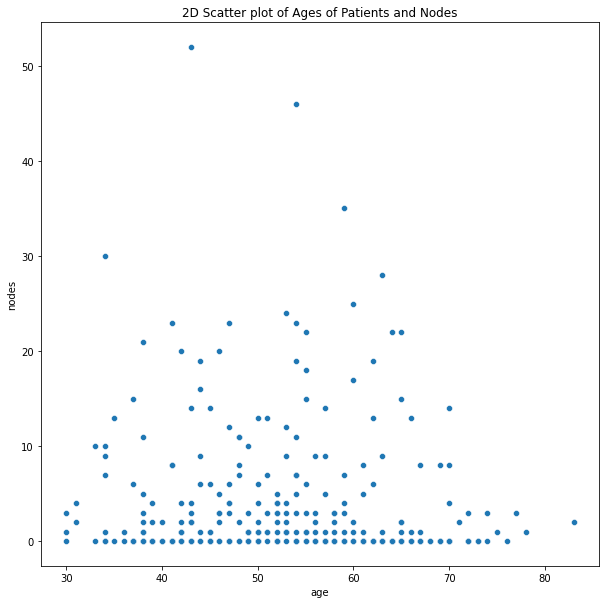

In [4]:
# Plotting a 2D Scatter plot between age and number of nodes
ax = sns.scatterplot(x="age",y="nodes",data=hbm)
plt.title("2D Scatter plot of Ages of Patients and Nodes")
plt.show()

#### Conclusion:
This plot isn't very useful as we can't deduce much out of it.

### Color Coded 2D Scatter Plot.

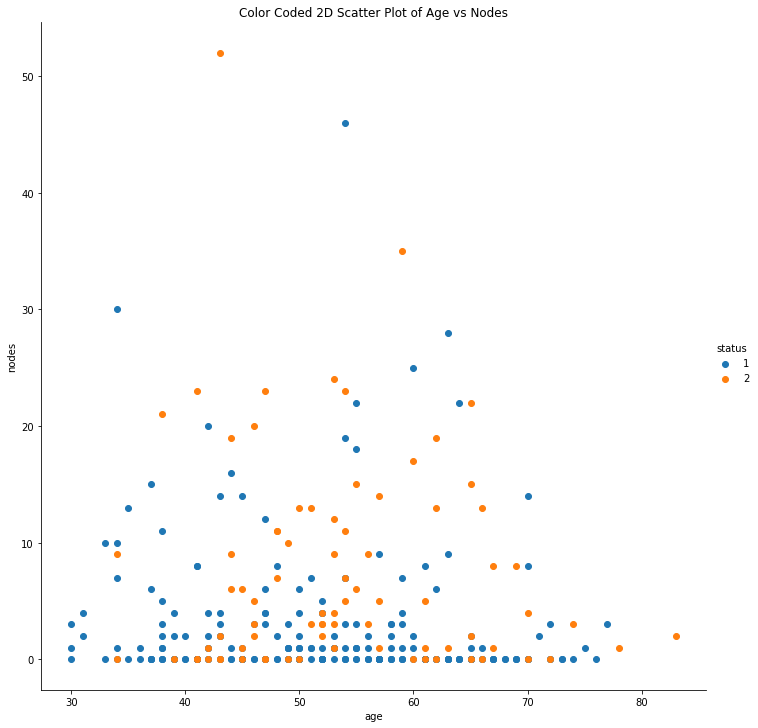

In [5]:
# Plotting a color coded 2D Scatter Plot between age and nodes
sns.FacetGrid(hbm, hue="status", height=10).map(plt.scatter, "age", "nodes").add_legend()
plt.title("Color Coded 2D Scatter Plot of Age vs Nodes")
plt.show()

#### Conclusion:
This plot shows that most of the people have nodes <= 10. And the number of people having more than 10 nodes appear to be part of status 2. However this isn't very accurate.

### Pair Plot

In [6]:
# Converting the dtype of status from int to str as int causes plot to look desaturated. 
hbm["status"] = hbm["status"].astype("str")

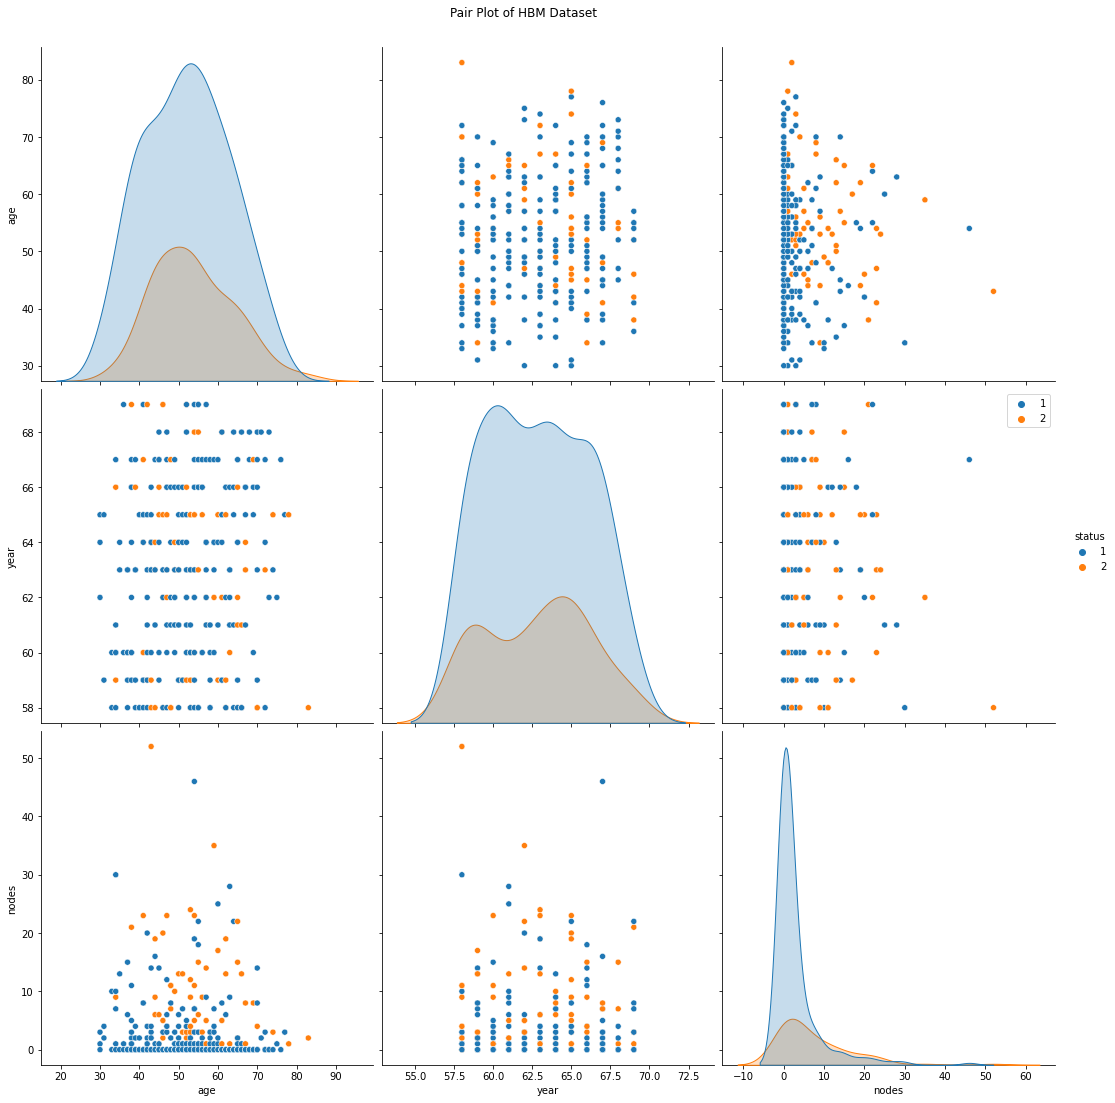

In [7]:
# Plotting a Pair Plot between all the features of the dataset
sns.pairplot(hue="status", data=hbm, height=5)
plt.title("Pair Plot of HBM Dataset", y=2.1,x=-0.6)
plt.legend()
plt.show()

#### Conclusion:
Pair plot provides two types of plots.
1. Plots 1,5,9 plot histograms of densities of various features.
2. Plots 2,3,4 and plots 6,7,8 are symmetrical to each other as they are the same plots with inverted axes.

All of these plots have large amounts of overlapping which makes making deductions harder and erroneous. However the plots between age and nodes seem to show the best variation among all of the other plots. This makes sense as year is sequential data and not much variation can be seen.

### 1D Scatter Plot

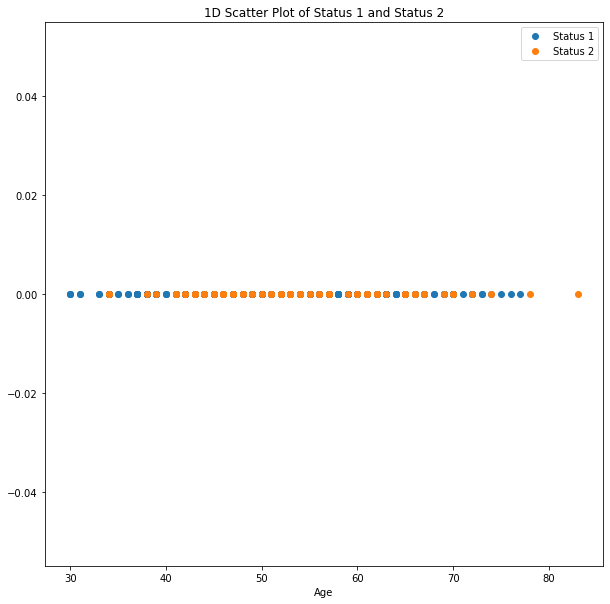

In [8]:
# Dividing the Dataset into two different parts.
# status_1 contains all rows with status as 1 whereas status_2 contains all rows with status as 2.
status_1 = hbm.loc[hbm["status"]=="1"]
status_2 = hbm.loc[hbm["status"]=="2"]
plt.title("1D Scatter Plot of Status 1 and Status 2")
# Plotting status_1 and status_2
plt.plot(status_1["age"], np.zeros_like(status_1["age"]), 'o',label='Status 1')
plt.plot(status_2["age"], np.zeros_like(status_2["age"]), 'o',label='Status 2')
plt.xlabel("Age")
plt.legend()
plt.show()

#### Conclusion:
Here people with status 1 are overlapped by people with status 2 rendering this graph useless.

### Univariate Analysis

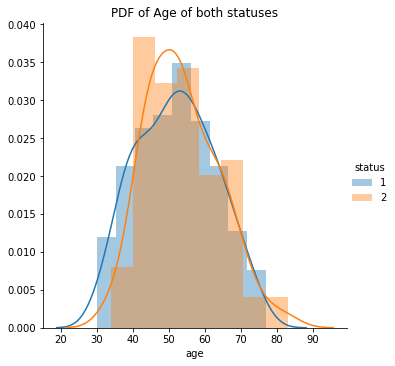

In [9]:
#Plotting PDF of age from both status
sns.FacetGrid(hbm, hue="status", height=5).map(sns.distplot, "age").add_legend()
plt.title("PDF of Age of both statuses")
plt.show()

#### Conclusion
In this plot of PDF of Ages, there seems to be lot of overlap. But if carefully observed, ages 45 to 65 seem to have the highest cases of Survival and ages 40 to 60 seem to have the highest cases of death. 

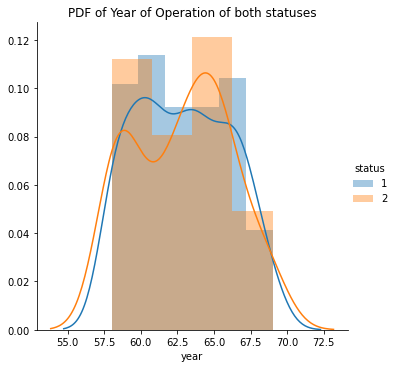

In [10]:
# Plotting PDF plot of Year of Operation
sns.FacetGrid(hbm, hue="status", height=5).map(sns.distplot, "year").add_legend()
plt.title("PDF of Year of Operation of both statuses")
plt.show()

#### Conclusion:
In this plot of PDF of Years of operations, a lot overlap is seen. This plot shows a little spike in the number of people that died within 5 years that were operated between 1960 and 1966. Although the size of dataset could make this an outlier

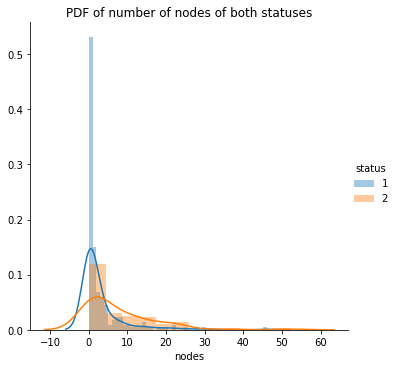

In [11]:
# Plotting PDF plot of Number of Nodes
sns.FacetGrid(hbm, hue="status", height=5).map(sns.distplot, "nodes").add_legend()
plt.title("PDF of number of nodes of both statuses")
plt.show()

#### Conclusion:
In this PDF of Nodes discovered, it is very clear that number of people with nodes < 4 have a very high chance of surviving whereas people with nodes > 4 have lesser chances of surviving. 

### Plotting CDF and PDF of both statuses.

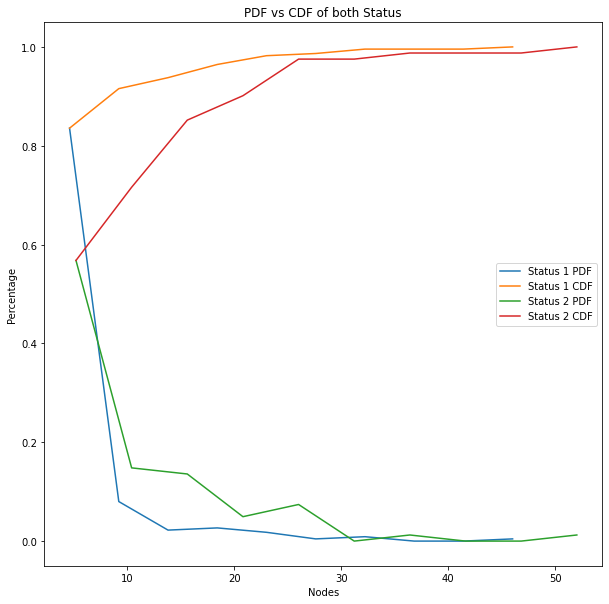

In [12]:
# Calculating and plotting of CDF of both statuses.
counts, bin_edges = np.histogram(status_1["nodes"], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="Status 1 PDF")
plt.plot(bin_edges[1:], cdf, label="Status 1 CDF")

counts, bin_edges = np.histogram(status_2['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="Status 2 PDF")
plt.plot(bin_edges[1:], cdf, label="Status 2 CDF")

plt.title("PDF vs CDF of both Status")
plt.xlabel("Nodes")
plt.ylabel("Percentage")
plt.legend()
plt.show()

#### Conclusion:
Patients with <4 nodes have a survival percentage of 83-85% 

### Mean, Median, Standard Deviation, Percentiles and Median Absolute Deviation.

In [13]:
# Creating a Pandas Dataframe to store the different values calculated.
num_analysis = {'Type' : ["Survived 5+ Years","Died within 5 Years"], \
                'Mean (Nodes)': [np.mean(status_1["nodes"]), np.mean(status_2["nodes"])], \
                'Standard Deviation (Nodes)': [np.std(status_1["nodes"]), np.std(status_2["nodes"])], \
                'Median (Nodes)': [np.median(status_1["nodes"]), np.median(status_2["nodes"])], \
                'Quantiles (Nodes)': [np.percentile(status_1["nodes"], np.arange(0,100,25))[1:], np.percentile(status_2["nodes"], np.arange(0,100,25))[1:]], \
                '90th Percentile (Nodes)': [np.percentile(status_1["nodes"],90), np.percentile(status_2["nodes"],90)], \
                'Median Absolute Deviation (Nodes)': [robust.mad(status_1["nodes"]), robust.mad(status_2["nodes"])]}
num_analysis_pd = pd.DataFrame(data=num_analysis)
num_analysis_pd

,Type,Mean (Nodes),Standard Deviation (Nodes),Median (Nodes),Quantiles (Nodes),90th Percentile (Nodes),Median Absolute Deviation (Nodes)
0,Survived 5+ Years,2.791111,5.857258,0.0,"[0.0, 0.0, 3.0]",8.0,0.000000
1,Died within 5 Years,7.456790,9.128776,4.0,"[1.0, 4.0, 11.0]",20.0,5.930409


#### Conclusions:
1. Median number of nodes discovered in people who survived for more than 5 years is 0.
2. 75% of People who survived have less than or euqal to 3 nodes. 
3. 95% of People who survived have less than or equal to 14 nodes.
4. Patients with more than 20 nodes did not survive more than 5 years. 

### Box Plot

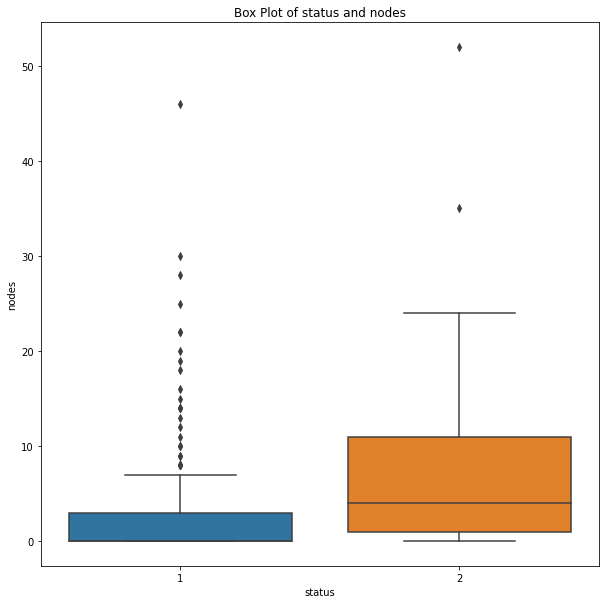

In [14]:
# Plotting a Box Plot between the status and number of nodes in the overall dataset
sns.boxplot(x="status", y="nodes", data=hbm)
plt.title("Box Plot of status and nodes")
plt.show()

#### Conclusion:
1. There are lot of outliers in the number of nodes of people who survived for more than 5 years post operation.
2. People with less than 4 nodes have very high survival rate. 
3. However majority of the deaths have patients with number of nodes between 2 and 12. 

This is indication that less number of nodes does not guarentee chances of survival. 

### Violin Plot

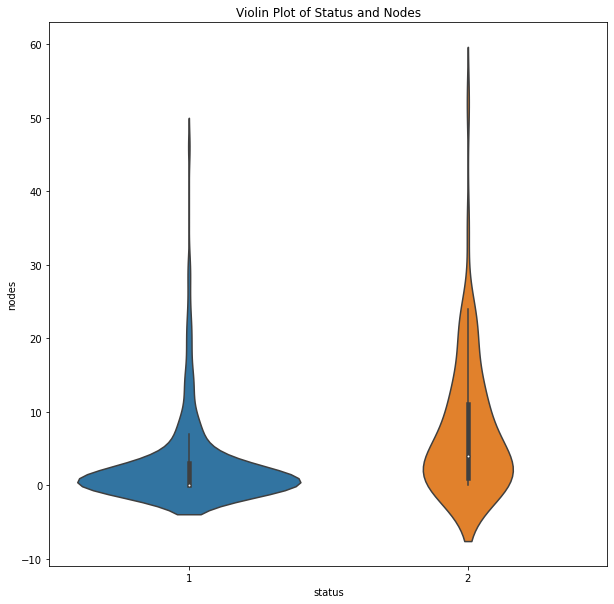

In [15]:
# Plotting a Violin Plot between Number of Nodes and Status in the overall dataset
sns.violinplot(x="status", y="nodes", data=hbm)
plt.title("Violin Plot of Status and Nodes")
plt.show()

#### Conclusion:
This plot shows that highest survival rate is seen when the number of nodes is in the range 0 to 7 as indicated by the box and whiskers. Since the data is very skewed, the tail of the plot is long. 

### Contour Plots

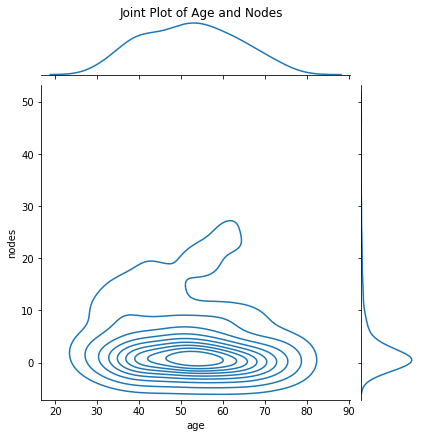

In [16]:
# Plotting a contour plot between age and number of nodes in the survival dataset
sns.jointplot(x="age",y="nodes",data=status_1, kind="kde")
plt.title("Joint Plot of Age and Nodes", y=1.2, x=-3)
plt.show()

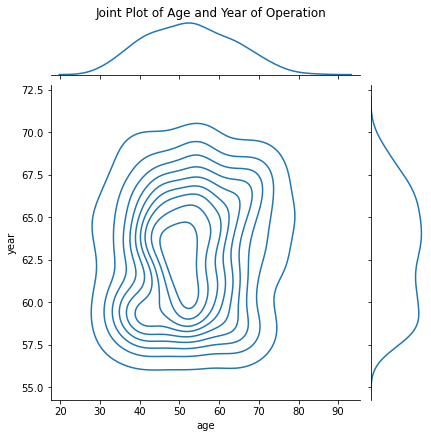

In [17]:
# Plotting a contour plot between age and year of operation in the entire dataset
sns.jointplot(x="age",y="year",data=hbm, kind="kde")
plt.title("Joint Plot of Age and Year of Operation", y=1.2, x=-3)
plt.show()

#### Conclusion: 
From the first contour plot, it can be seen that majority of the people who survived are in the age group of 48 to 70 with nodes in the range of 0 to 4.

From the second contour plot, it can be seen that majority of the people that got operated on are between the ages 45 to 55 and had the operation between 1958 and 1964.

## Final Conclusions/Summary:


1. The data set is more skewed as status_1, number of people who survived for 5 or more years after the operation is 225 whereas the number of people who died within 5 years of the operation in 81.
2. Ages 45 to 65 seem to have the highest cases of Survival and ages 40 to 60 seem to have the highest cases of death.
3. A little spike in the number of people that died within 5 years that were operated between 1960 and 1966 can be seen. Although the size of dataset could make this an outlier and doesn't help in predicting the survival chances of a patient being operated now.
4. It is very clear that number of people with nodes < 4 have a very high chance of surviving whereas people with nodes > 4 have lesser chances of surviving.
5. Patients with <4 nodes have a survival percentage of 83-85% 
6. Median number of nodes discovered in people who survived for more than 5 years is 0.
7. 75% of People who survived have less than or euqal to 3 nodes.
8. 95% of People who survived have less than or equal to 14 nodes.
9. Patients with more than 20 nodes did not survive more than 5 years.
10. There are lot of outliers in the number of nodes of people who survived for more than 5 years post operation.
11. People with less than 4 nodes have very high survival rate. However majority of the deaths have patients with number of nodes between 2 and 12. This is indication that less number of nodes does not guarentee chances of survival. 
12. Highest survival rate is seen when the number of nodes is in the range 0 to 7 as indicated by the box and whiskers. Since the data is very skewed, the tail of the plot is long.
13. Majority of the people who survived are in the age group of 48 to 70 with nodes in the range of 0 to 4.
14. Majority of the people that got operated on are between the ages 45 to 55 and had the operation between 1958 and 1964.

From the above conclusions, it can be stated that classification of survival of patient based on their Age, Number of Nodes and Year of Operation is difficult because of the skewed dataset and overlapping of data. 